# Progetto finale
- In questo notebook vengono presentate sia la parte di visualizzazione grafica dei risultati, sia la parte di algoritmo del viaggiatore, ovvero gli ultimi due punti esplicitati nel file read.me
- al fine di rendere il notebook più fluido e facilmente replicabile i dataset e il grafo sono stati caricati. Per visualizzare la loro costruzione si rimanda ai relativi notebook


## Data Visualization

In [23]:
pip install fiona

In [28]:
# importazione di tutti i pacchetti utili
import networkx as nx
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from matplotlib import animation
import matplotlib
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
from shapely.geometry import Point
import pickle


In [29]:
# importazione geodataframe per la visuLizzazione
world=gpd.read_file(r'C:/Users/lucam/Documents/master/Viaggiatore_finale/Data/world_viz_plot/world_viz_plot.')

ImportError: the 'read_file' function requires the 'fiona' package, but it is not installed or does not import correctly.
Importing fiona resulted in: DLL load failed while importing ogrext: Impossibile trovare la procedura specificata.

In [17]:
# importazione anomalie globali
avg_global_anomaly=pd.read_csv(r'C:/Users/lucam/Documents/master/Viaggiatore_finale/Data/dataset_visualiz_anom_glob_2020.csv')
avg_global_anomaly.drop(columns={'Unnamed: 0'}, inplace=True)

In [18]:
avg_global_anomaly

,Year,Anomaly
0,1891,-0.634047
1,1892,-0.585573
2,1893,-0.708100
3,1894,-0.559085
4,1895,-0.518558
...,...,...
125,2016,1.252929
126,2017,1.099427
127,2018,1.177114
128,2019,1.336224


In [19]:
#creazione liste per plottare le anomalie globali
x=list(range(1891,2021))
y=[]

for i in range(130):
    
    y.append(avg_global_anomaly.loc[i][1])

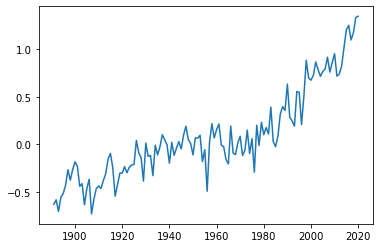

In [20]:
# rappresentazione grafica anomalie
plt.plot(x,y)

In [21]:
#base reference
y_ref=[]

for i in range(len(x)):
    
    y_ref.append(0)

In [22]:
# gradiente colore
norm = TwoSlopeNorm(vmin=-2.8, vcenter=0, vmax=2.8)

In [ ]:
# importazione anomalie per città
coord_pl=pd.read_csv(r'C:/Users/lucam/Documents/master/Viaggiatore_finale/Data/city_anom_plot.csv')
coord_pl.drop(columns={'Unnamed: 0'}, inplace=True)
coord_pl

In [ ]:
#filtro anomalie > 2°C
coord_pl=coord_pl[coord_pl['Anomaly']>2].sort_values('Year').reset_index()[['Year','Latitude','Longitude','Anomaly','CLL']]
coord_pl

In [ ]:
# definizione funzione per ottenere le coordinate delle città
def get_coord(year):
    
    lat=[]
    lon=[]
    
    for i in range(coord_pl.shape[0]):
        
        if coord_pl.loc[i]['Year']==year:
            
            lat.append(coord_pl.loc[i]['Latitude'])
            lon.append(coord_pl.loc[i]['Longitude'])
            
    return lat,lon

In [ ]:
#creazione immagini per la gif variazione temperature
for year in range(1891,2021):
    
    fig = plt.figure(figsize=(35,20))
    gs = matplotlib.gridspec.GridSpec(7, 7, wspace=0.4, hspace=0.2) 
    ax1 = fig.add_subplot(gs[0:6,1:]) 
    ax2 = fig.add_subplot(gs[5:, 1:]) 


    ax2.axis('off')
    
    ax2=plt.plot(x,y_ref,'--',color='black',alpha=0.5)
    ax2=plt.scatter(x[128],y[128],alpha=0)
    ax2=plt.scatter(x[2],y[2],alpha=0)
    ax2=plt.scatter(x[16],y[16],alpha=0)
    ax2=plt.scatter(x[15],y[15],alpha=0)
    ax2=plt.scatter(x[17],y[17],alpha=0)
    ax2=plt.plot(x[0:year-1891+1],y[0:year-1891+1],color='black')    

    if y[year-1891] > 0:
        ax2=plt.scatter(x[year-1891],y[year-1891],color='red',s=120)
    else:
        ax2=plt.scatter(x[year-1891],y[year-1891],color='blue',s=120)


    plt.legend(['Base reference','Average global anomaly'],loc='lower right',prop={'size':25}, bbox_to_anchor=(0.97,-0.2))



    divider = make_axes_locatable(ax1)

    cax = divider.append_axes("right", size="2%", pad=-0.1)

    ax1.axis('off')

    plt.text(-268,-3.5,'Avg Global Anomaly : {:.2f} °C'.format(y[year-1891]),fontdict={'fontsize': '35', 'fontweight' : '3','color':'black',
                                         'fontname':'calibri'})

    ax1=world.plot(ax=ax1,column=str(year),cmap='coolwarm',norm=norm,legend=True,cax=cax,linewidth=0.7,edgecolor='white')

    if y[year-1891] > 0:


        ax1.set_title(str(year), fontdict={'fontsize': '45', 'fontweight' : '3','color':'black',
                                              'fontname':'calibri'},x=0.085,y=0.43,bbox=dict(boxstyle="square",alpha=0.1,
                                                                                            color='red'))
    else:

        ax1.set_title(str(year), fontdict={'fontsize': '45', 'fontweight' : '3','color':'black',
                                              'fontname':'calibri'},x=0.085,y=0.43,bbox=dict(boxstyle="square",alpha=0.1,
                                                                                            color='blue'))



    ax1.text(s=': Temperature anomaly > 2°C',y=-46.5,x=-176,fontdict={'fontsize': '25', 'fontweight' : '3','color':'black',
                                          'fontname':'calibri'})

    (a,b)=get_coord(year)

    ax1.scatter(b,a,color='red',s=50,edgecolor='white')

    l_x=-180
    l_y=-45
    ax1.scatter(l_x,l_y,color='red',s=80)

    plt.savefig('worldglobalanomaly_{}.jpeg'.format(year),bbox_inches='tight')

## "Viaggiatore freddoloso"

In [9]:
# importazione del dataset delle città
df_cities=pd.read_csv(r'C:/Users/lucam/Documents/master/Viaggiatore_finale/Data/dataset_cities_finale_2020.csv')

In [10]:
# importazione del grafo costruito nel notebook building_graph
G=nx.readwrite.gpickle.read_gpickle(r'C:/Users/lucam/Documents/master/Viaggiatore_finale/Data/grafo1')

In [12]:
# creazione del "viaggiatore" con la programmazione ad oggetti
class Viaggiatore(object):

    # definizione del punto di partenza e del punto di arrivo e e delle altre variabili di istanza
    def __init__(self,G,df_cities):
        
        self.starting_point = 'Peking 39.38 116.53'
        self.ending_point = 'Los Angeles 34.56 -118.7'
        self.G=G
        self.history=[]
        self.index=0
       
    # definizione della funzione che permette di generare un input in cui l'utente può selezionare la data per cui calcolare il percorso
    def get_data(self):

        self.year=input('Inserisci la data (YYYY-MM-GG):')
        
        self.year=self.year[0:8]+'01'
        
        self.df=df_cities[df_cities['dt']==self.year]
        
    # definizione della funzione per prelevare la temperatura per una data città in dato periodo      
    def get_temp(self,city):
        
        t=self.df[self.df['CLL']==city]['AverageTemperature'].reset_index()['AverageTemperature'][0]
        
        return t
    
    # definizione della funzione per aggiungere la temperatura della città di arrivo come peso dell'arco del grafo
    def add_temp(self):
        
        for city_1,city_2 in self.G.edges():
            
            G[city_1][city_2]['weight'] = self.get_temp(city_2)
      
    # definizione della funzione per permettere al viaggiatore di selezionare la città con la temperatura maggiore per ogni step
    def make_a_choice(self,city):
         
        possible_choices=[]
        
        for edge in self.G.edges(city):
            
            possible_choices.append([G.get_edge_data(edge[0],edge[1])['weight'],edge[1]])
            
        if self.ending_point[-12:] in [x[1][-12:] for x in possible_choices]:
            
            t=self.ending_point
            
        else:
            
            t=max([x[0:] for x in possible_choices])
            
        return t
    # definizione della funzione per prelevare le coordinate di ciascuna città
    def coord_transform(self):
    
        lat_list=[]
        lon_list=[]

        for i in range(0,len(self.history)):


            c=[float(x) for x in self.history[i][1].split()[-2:]]

            lat_list.append(c[0])
            lon_list.append(c[1])

        return lat_list,lon_list
    
    # definizione della funzione che permette di creare i pop-up con nome della città e temperatura media per ogni città appartenente alla history
    def cities_geo_frame(self,lat,lon):
        
        name=[]
        geom=[]

        for i in range(len(self.history)):

            name.append(" ".join(traveler.history[i][1].split()[:-2])+'.<br>' + 'Temperature:<br>'
                        +"{:.2f}".format(traveler.history[i][0]))
            geom.append(Point(lon[i], lat[i]))

        d={'name':name,'geometry':geom}

        cities_plot = gpd.GeoDataFrame(d, crs="EPSG:4326")
        
        return cities_plot
        
    # definizione della funzione che raccoglie tutte le precedenti funzioni e permette al viaggiatore di "viaggiare" ad ogni step verso la città più calda partendo da Pechino fino a Los Angeles
    # la funzione .m restituisce il grafico interattivo che attraverso un line plot mostra tutte le tappe del viaggiatore
    def travel(self):
        
        self.m=folium.Map(zoom_start=2)
        self.get_data()
        self.add_temp()
        self.history=[[self.get_temp(self.starting_point),self.starting_point]]
        step_2=self.make_a_choice(self.starting_point)
        self.history.append(step_2)
        previous_step=step_2
        
        while previous_step[-12:]!=self.ending_point[-12:]:
            
            step=self.make_a_choice(previous_step)
            previous_step=step
            self.history.append(step)   
            
        self.history.pop()
        self.history.append([self.get_temp(self.ending_point),self.ending_point])
        
        lat,lon=self.coord_transform()
          
        cities=self.cities_geo_frame(lat,lon)
                
        for i in range(len(self.history)):
            
            folium.Marker((lat[i],lon[i]),
                          
                 popup=cities.loc[i]['name']).add_to(self.m)
            
        p=[]
        for i in range(len(lat)):

            p.append((lat[i],lon[i]))
            
        
            
        folium.PolyLine(p, color="blue", weight=2.5, opacity=1).add_to(self.m)

In [14]:
# si crea un viaggiatore inserendo come input il grafo già creato e il dataset ripulito e aggiornato
traveler=Viaggiatore(G=G,df_cities=df_cities)

In [15]:
# e.g. si richiama la funzione travel che calcola il percorso del viaggiatore dopo la scelta della data da parte dell'utente
traveler.travel()

Inserisci la data (YYYY-MM-GG):2012-01-30


In [16]:
# e.g. si richiama la funzione per mostrare la mappa delle tappe
traveler.m